# Laguerre plot

In [260]:
import numpy as np
import matplotlib.pyplot as plt

In [261]:
def laguerre_polynomials(t, n, beta=2, omega=4):
    # Validators
    if beta < 0:
        raise ValueError("Value \"beta\" must be positive")

    if omega < beta:
        raise ValueError("Value \"omega\" must be greater than beta")

    if n < 0:
        raise ValueError("Value \"n\" must be positive")

    # Calculation
    result = np.zeros(n + 1)
    result[0] = np.sqrt(omega) * np.exp(-beta * t / 2)

    if n > 0:
        result[1] = np.sqrt(omega) * (1 - omega * t) * np.exp(-beta * t / 2)

    for i in np.arange(2, n + 1):
        result[i] = ((2 * i - 1 - omega * t) / i) * result[i - 1] - ((i - 1) / i) * result[i - 2]

    return result[n]


In [262]:
class PlotType:
    LINE = 1
    BAR = 2


def laguerre_polynomials_plot(t_max, n_max, beta=2, omega=4, samples=None, plot_type: PlotType = PlotType.LINE):
    default_samples = {
        PlotType.LINE: 1000,
        PlotType.BAR: 25
    }

    if samples is None:
        samples = default_samples[plot_type]

    t_values = np.linspace(0, t_max, samples)
    colors = ['r', 'g', 'b', 'y', 'm', 'c']

    for n in range(n_max + 1):
        y_values = [laguerre_polynomials(t, n, beta, omega) for t in t_values]

        if plot_type == PlotType.LINE:
            plt.plot(t_values, y_values, label=f'$L_{n}(t, {beta}, {omega})$', color=colors[n % len(colors)],
                     zorder=1)
        elif plot_type == PlotType.BAR:
            plt.bar(t_values, y_values, label=f'$L_{n}(t, {beta}, {omega})$', color=colors[n % len(colors)],
                    zorder=1)
        else:
            raise ValueError("Invalid plot type")

    plt.xlabel('t')
    plt.ylabel('Laguerre Polynomial')
    plt.legend()
    plt.axhline(y=0, color='k', zorder=0)
    plt.axvline(x=0, color='k', zorder=0)
    plt.grid()
    plt.show()

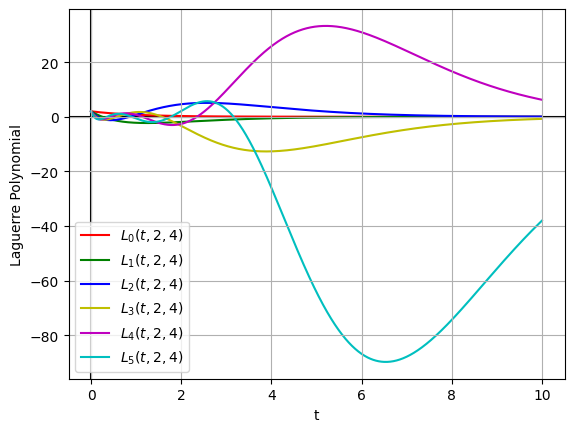

In [263]:
laguerre_polynomials_plot(10, 5, 2, 4, plot_type=PlotType.LINE)

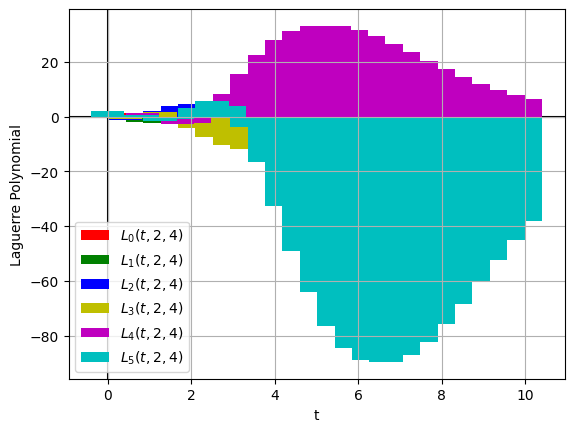

In [264]:
laguerre_polynomials_plot(10, 5, 2, 4, plot_type=PlotType.BAR)